In [2]:
#
#  File:
#    NUG_unstructured_contour_cellfill_PyNGL.py
#
#  Synopsis:
#    Illustrates how to create cell-filled contours of unstructured data
#
#  Categories:
#    contour plots
#
#  Author:
#    Karin Meier-Fleischer
#  
#  Date of initial publication:
#    August 2015
#
#  Description:
#    This example shows how to create cell-filled contours of the
#    unstructured ICON grid.
#
#  Effects illustrated:
#    o  Using cell fill mode
#    o  Using a cylindrical equidistant map projection
#    o  How to specify explicit contour levels.
# 
#  Output:
#    A single visualization is produced.
#
#  Notes: The data for this example can be downloaded from 
#    http://www.ncl.ucar.edu/Document/Manuals/NCL_User_Guide/Data/
#     
"""
  NCL User Guide Python Example:   NUG_unstructured_contour_cellfill_PyNGL.py
    - unstructured data (ICON)
    - contour plot
    - CellFill
 05.06.15  kmf
"""
from __future__ import print_function
import numpy as np
import math, time
import sys,os
import Ngl,Nio

#----------------------
#-- MAIN
#----------------------
t1 = time.time()                                   #-- retrieve start time
print("")

#--  define variables
diri  = "./"                                       #-- data path
fname = "ta_ps_850.nc"                             #-- data file
gname = "r2b4_amip.nc"                             #-- grid info file
ffile = os.path.join(diri, fname)
gfile = os.path.join(diri, gname)

#---Test if files exist
if(not os.path.exists(ffile) or not os.path.exists(gfile)):
    print("You do not have the necessary files to run this example, '{}' and '{}'.".format(ffile, gfile))
    print("You can get the files from the NCL website at:")
    print("http://www.ncl.ucar.edu/Document/Manuals/NCL_User_Guide/Data/")
    sys.exit()

#--  open file and read variables
f = Nio.open_file(ffile, "r")                #-- add data file
g = Nio.open_file(gfile, "r")                #-- add grid file (not contained in data file!!!)

#-- read a timestep of "ta" 
var =  f.variables["ta"][0,0,:]                    #-- first time step, lev, ncells

print("-----------------------")
print(f.variables["ta"])                           #-- like printVarSummary
print("-----------------------")

title    = "ICON:  Surface temperature"            #-- title string
varMin   =  230                                    #-- data minimum
varMax   =  310                                    #-- data maximum
varInt   =    2                                    #-- data increment
levels   =  list(range(varMin,varMax,varInt))      #-- set levels array

#-------------------------------------------------------------------
#-- define the x-, y-values and the polygon points
#-------------------------------------------------------------------
rad2deg = 45./np.arctan(1.)                        #-- radians to degrees

x      =  g.variables["clon"][:]                   #-- read clon
y      =  g.variables["clat"][:]                   #-- read clat
vlon   =  g.variables["clon_vertices"][:]          #-- read clon_vertices
vlat   =  g.variables["clat_vertices"][:]          #-- read clat_vertices

ncells =  vlon.shape[0]                            #-- number of cells
nv     =  vlon.shape[1]                            #-- number of edges

x      =  x    * rad2deg                           #-- cell center, lon
y      =  y    * rad2deg                           #-- cell center, lat
vlat   =  vlat * rad2deg                           #-- cell lattitude vertices
vlon   =  vlon * rad2deg                           #-- cell longitude vertices

#-- longitude values -180. - 180.
for j in range(1,ncells):
    for i in range(1,nv):
        if vlon[j,i] < -180. :
           vlon[j,i] = vlon[j,i] + 360.
        if vlon[j,i] > 180. :
           vlon[j,i] = vlon[j,i] - 360.

#-- information
print("")
print("Cell points:           {}".format(nv))
print("Cells:                 {}".format(ncells))
print("Variable ta   min/max:  {:.2f} / {:.2f}".format(np.min(var), np.max(var)))
print("")

#-- open a workstation
wks_type = "png"
wks_name = "NUG_unstructured_contour_cellfill_PyNGL"
wks      =  Ngl.open_wks(wks_type,wks_name)        #-- open a workstation

#-- set resources
res                      =  Ngl.Resources()        #-- plot mods desired.
res.nglDraw              =  False                  #-- turn off plot draw and frame advance. We will
res.nglFrame             =  False                  #-- do it later after adding subtitles.

res.cnFillOn             =  True                   #-- color plot desired
res.cnFillMode           = "CellFill"              #-- set fill mode
res.cnFillPalette        = "BlueWhiteOrangeRed"    #-- choose colormap
res.cnLinesOn            =  False                  #-- turn off contour lines
res.cnLineLabelsOn       =  False                  #-- turn off contour labels
res.cnLevelSelectionMode = "ExplicitLevels"        #-- use explicit levels
res.cnLevels             =  levels                 #-- set levels

res.lbOrientation        = "Horizontal"            #-- vertical by default
res.lbBoxLinesOn         =  False                  #-- turn off labelbar boxes
res.lbLabelFontHeightF   =  0.01                   #-- labelbar label font size

res.mpFillOn             =  False                  #-- don't use filled map
res.mpGridAndLimbOn      =  False                  #-- don't draw grid lines

res.sfXArray             =  x                      #-- transform x to mesh scalar field
res.sfYArray             =  y                      #-- transform y to mesh scalar field
res.sfXCellBounds        =  vlon                   #-- needed if set cnFillMode = "CellFill"
res.sfYCellBounds        =  vlat                   #-- needed if set cnFillMode = "CellFill"

res.tiMainString         = "Unstructured grid:  ICON" #-- title string
res.tiMainOffsetYF       =  0.03                   #-- move main title towards plot

#-- create the plot
plot = Ngl.contour_map(wks,var,res)  

#-- draw the plot and advance the frame
Ngl.draw(plot)
Ngl.frame(wks)

#-- get wallclock time
t2 = time.time()
print("Wallclock time:  {:0.3f} seconds".format(t2-t1))
print("")

Ngl.end()



-----------------------
Variable: ta
Type: float
Total Size: 983040 bytes
            245760 values
Number of Dimensions: 3
Dimensions and sizes:	[time | 12] x [lev | 1] x [ncells | 20480]
Coordinates: 
            time: [19790131..19791231]
            lev: [85000..85000]
            ncells: not a coordinate variable
Number of Attributes: 7
         standard_name :	temperature
         long_name :	absolute temperature
         units :	K
         grid_type :	unstructured
         number_of_grid_in_reference :	1
         _FillValue :	-9e+33
         missing_value :	-9e+33

-----------------------

Cell points:           3
Cells:                 20480
Variable ta   min/max:  238.28 / 294.22

Wallclock time:  0.039 seconds



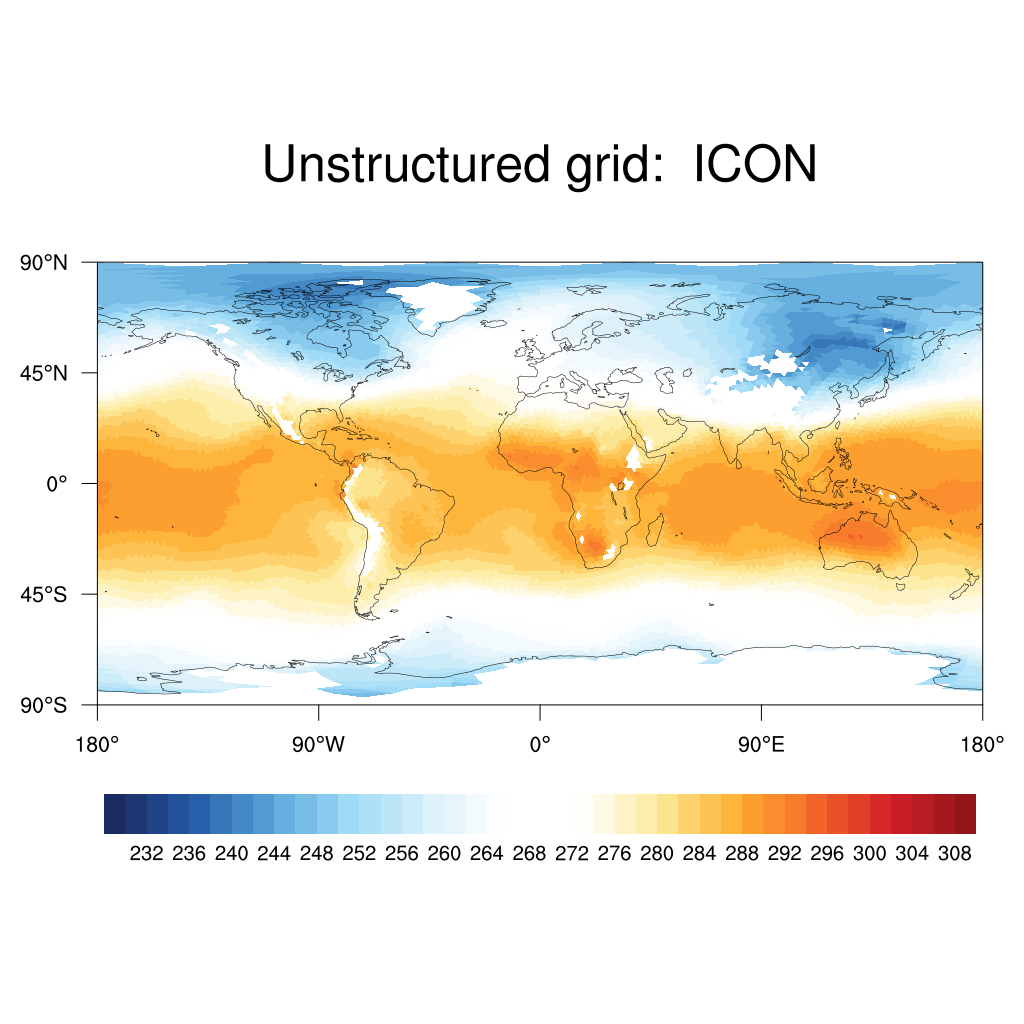